In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh

x_min, x_max = -5, 5
N = 1000
x = np.linspace(x_min, x_max, N)
h = (x_max - x_min) / (N - 1)

In [41]:
T = diags([-1/(2*h**2), 1/h**2, -1/(2*h**2)], [-1, 0, 1], shape=(N, N))
V1 = diags(0.5*x**2 + 0.1*x**4, 0, shape=(N, N))
V2 = diags(0.5*x**2, 0, shape=(N, N))
H1 = T + V1
H2 = T + V2

In [42]:
eig1, eigvec1 = eigsh(H1, k=5, which='SA')
eig1

array([0.55914188, 1.76947625, 3.13854482, 4.62870983, 6.21998598])

In [43]:
eig2, eigvec2 = eigsh(H2, k=5, which='SA')
eig2

array([0.49999687, 1.49998435, 2.49995937, 3.49992284, 4.49988328])

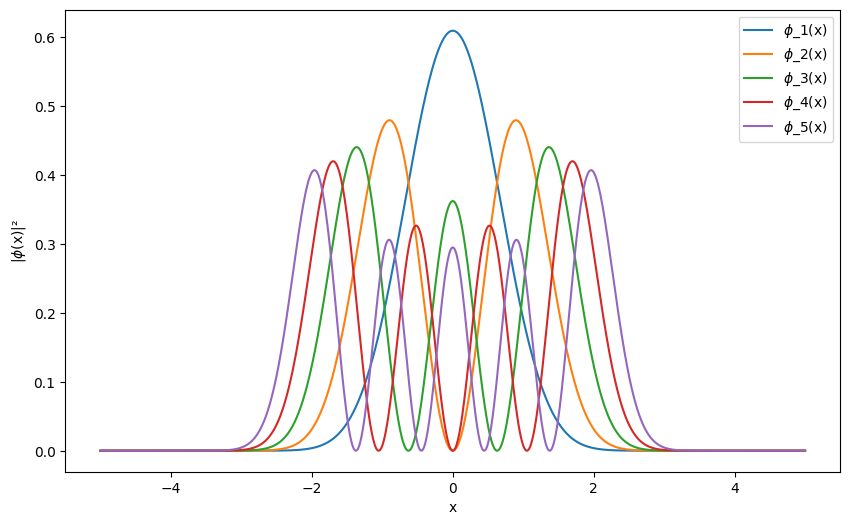

In [44]:
plt.figure(figsize=(10,6))
plt.tight_layout(pad=5)

for i in range(5):
    norm = np.sqrt(np.sum(eigvec1[:, i] ** 2) * h)
    phi = eigvec1[:, i] / norm
    plt.plot(x, np.abs(phi) ** 2, label=f'$\phi$_{i+1}(x)')

plt.xlabel('x')
plt.ylabel('|$\phi$(x)|²')
plt.legend()
plt.show()

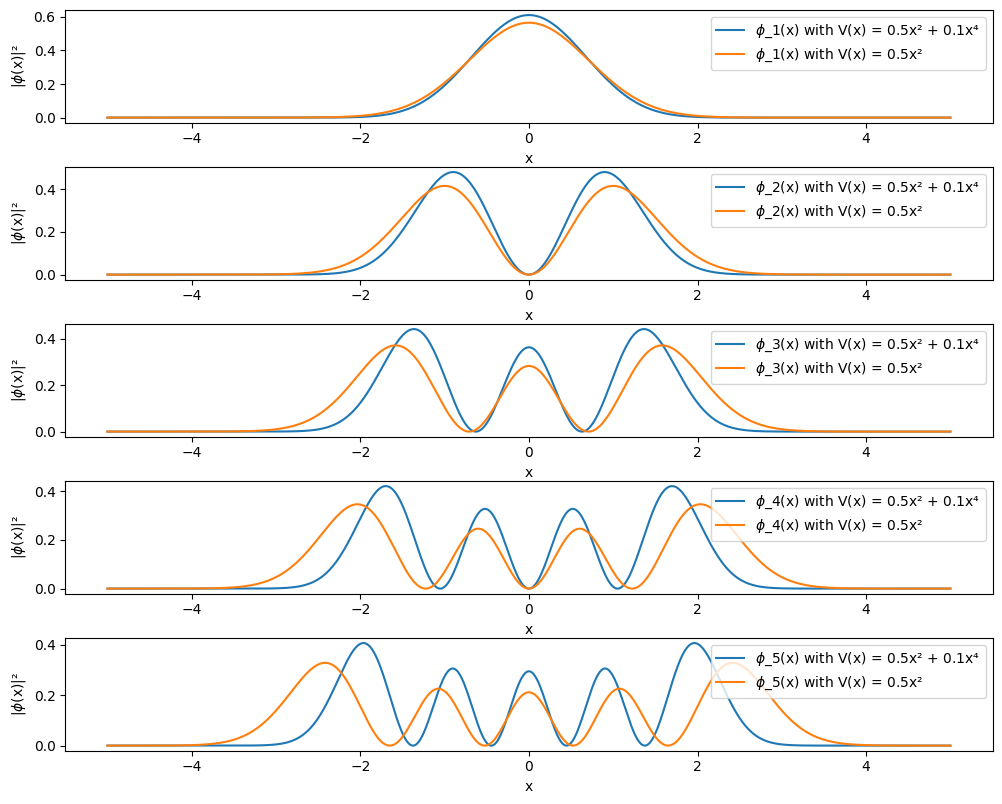

In [46]:
fig, axes = plt.subplots(5, 1, figsize=(10,8))
plt.tight_layout()

for i in range(5):
    norm1 = np.sqrt(np.sum(eigvec1[:, i] ** 2) * h)
    norm2 = np.sqrt(np.sum(eigvec2[:, i] ** 2) * h)

    axes[i].plot(x, np.abs(eigvec1[:, i] / norm1) ** 2, label=f'$\phi$_{i+1}(x) with V(x) = 0.5x² + 0.1x⁴')
    axes[i].plot(x, np.abs(eigvec2[:, i] / norm2) ** 2, label=f'$\phi$_{i+1}(x) with V(x) = 0.5x²')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('|$\phi$(x)|²')
    axes[i].legend()

plt.show()